# <img style="float: left; padding-right: 20px; width: 200px" src="https://raw.githubusercontent.com/raxlab/imt2200-data/main/media/logo.jpg">  IMT 2200 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Instituto de Ingeniería Matemática y Computacional**<br>
**Profesor:** Rodrigo A. Carrasco <br>
---

# <h1><center>Clase 18: Exploración de Datos</center></h1>

En este notebook probaremos diferentes metodologías de exploración de datos sobre una base para generar hipótesis, visualizar información y entender qué información está en los datos.

## Caso de Estudio: Análisis de Votaciones Presidenciales en EEUU 2020.


### Descripción del Dataset.

Los datos para este problema correspoden a los resultados de las elecciones presidenciales 2020 de EEUU (Biden vs. Trump), a nivel de condados. Además, se incluyen algunas variables sociodemográficos y resultados de elecciones anteriores.

Estos datos pueden ser visualizados en el siguiente mapa de USA Today:

https://www.usatoday.com/in-depth/graphics/2020/11/10/election-maps-2020-america-county-results-more-voters/6226197002/


### Objetivo.

Analizar el comportamiento de distintos estados y condados en las elecciones presidenciales estadounidenses 2020. Por ejemplo, algunas preguntas que podríamos responder a partir de los datos son:

- ¿Cómo se distribuyen los condados donde ganó la opción demócrata (Biden) o republicana (Trump)?
- ¿En qué se parecen/diferencian?
- ¿Hay correlaciones entre el porcentaje de voto demócrata (o republicano) y otras variables políticas o sociodemográficas?
- ¿Es el comportamiento de un condado o estado, predictor de otro?
- ¿Hay similitudes entre los swing states?

## 1. Datos a analizar

El archivo `county_election_results.csv` será la base que usaremos para este trabajo.

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns

### Lectura de Datos.

La librería Pandas implemente métodos de lectura de distintos tipos de datos, entre ellos datos en formato `csv`, mediante la función `read_csv`:

https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

In [2]:
dat = pd.read_csv('county_election_results.csv')

#caculamos el porcentaje de votos D y R en cada condado, para identificar más fácilmente quién ganó en cada uno
dat['pct_D'] = dat['votes_D_2020']/dat['votes_total_2020']*100
dat['pct_R'] = dat['votes_R_2020']/dat['votes_total_2020']*100

dat.head()

,Unnamed: 0,FIPS,eevp,electTotal,electionDate,level,office,state,winner,votes_R_2020,...,votes_2008,votes_2012,votes_2016,category_2016_dem,category_2016_rep,votes_d_2016,votes_r_2016,votes_cast_pct_2016,pct_D,pct_R
0,0,1061,100,0,2020-11-03,FIPSCode,presidential,AL,R,10848,...,11657,11320,11758,NaN,top 10% Trump by percent vote,1525,9994,1.065913,12.726402,86.555493
1,1,1021,100,0,2020-11-03,FIPSCode,presidential,AL,R,16085,...,17785,17462,18369,NaN,top 10% Trump by percent vote,2911,15081,1.049649,15.937970,83.424096
2,2,1049,100,0,2020-11-03,FIPSCode,presidential,AL,R,24767,...,24015,23863,25826,NaN,top 10% Trump by percent vote,3622,21405,1.134438,14.611919,84.534781
3,3,1093,100,0,2020-11-03,FIPSCode,presidential,AL,R,12205,...,12355,12105,12984,NaN,top 10% Trump by percent vote,1432,11274,1.061537,10.614525,88.551114
4,4,1059,100,0,2020-11-03,FIPSCode,presidential,AL,R,10376,...,11693,10859,12040,NaN,NaN,2197,9466,1.043854,16.597708,82.558880


In [3]:
dat.columns

Index(['Unnamed: 0', 'FIPS', 'eevp', 'electTotal', 'electionDate', 'level',
       'office', 'state', 'winner', 'votes_R_2020', 'votes_D_2020',
       'votes_third_party_2020', 'votes_total_2020', 'export_time',
       'acs_pct_pop_nonwhite', 'acs_pct_management', 'acs_pct_service',
       'pct_pop25+_bachelor_higher', 'median_household_income',
       'per_capita_income', 'category_education', 'category_income',
       'category_nonwhite', 'category_jobs_management',
       'category_jobs_service', 'pew_classification', 'region',
       'category_unemployment', 'date', 'POPESTIMATE2019', 'deaths',
       'deaths_per_thousand', 'deaths_percap_pctile', 'cases',
       'cases_per_thousand', 'cases_percap_pctile', 'case_pct_change',
       'BLS_Area_Code', 'Month', 'Month_Str', 'Labor Force', 'Employment',
       'Unemployment', 'Unemployment Rate', 'county', 'pct_2000_dem',
       'pct_2000_gre', 'pct_2000_rep', 'pct_2004_dem', 'pct_2004_rep',
       'pct_2008_dem', 'pct_2008_rep', 'pct_

In [4]:
columns = ['pct_D','pct_R','acs_pct_pop_nonwhite', 'acs_pct_management', 'acs_pct_service',
       'pct_pop25+_bachelor_higher', 'median_household_income',
       'per_capita_income','POPESTIMATE2019','state','county','Unemployment Rate','winner','region']
dat2 = dat[columns]

## 2. EDA General

### 2.1 Revisemos algunas cosas generales de la base de datos

In [5]:
dat.head()

,Unnamed: 0,FIPS,eevp,electTotal,electionDate,level,office,state,winner,votes_R_2020,...,votes_2008,votes_2012,votes_2016,category_2016_dem,category_2016_rep,votes_d_2016,votes_r_2016,votes_cast_pct_2016,pct_D,pct_R
0,0,1061,100,0,2020-11-03,FIPSCode,presidential,AL,R,10848,...,11657,11320,11758,NaN,top 10% Trump by percent vote,1525,9994,1.065913,12.726402,86.555493
1,1,1021,100,0,2020-11-03,FIPSCode,presidential,AL,R,16085,...,17785,17462,18369,NaN,top 10% Trump by percent vote,2911,15081,1.049649,15.937970,83.424096
2,2,1049,100,0,2020-11-03,FIPSCode,presidential,AL,R,24767,...,24015,23863,25826,NaN,top 10% Trump by percent vote,3622,21405,1.134438,14.611919,84.534781
3,3,1093,100,0,2020-11-03,FIPSCode,presidential,AL,R,12205,...,12355,12105,12984,NaN,top 10% Trump by percent vote,1432,11274,1.061537,10.614525,88.551114
4,4,1059,100,0,2020-11-03,FIPSCode,presidential,AL,R,10376,...,11693,10859,12040,NaN,NaN,2197,9466,1.043854,16.597708,82.558880


In [6]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3112 entries, 0 to 3111
Data columns (total 68 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  3112 non-null   int64  
 1   FIPS                        3112 non-null   int64  
 2   eevp                        3112 non-null   int64  
 3   electTotal                  3112 non-null   int64  
 4   electionDate                3112 non-null   object 
 5   level                       3112 non-null   object 
 6   office                      3112 non-null   object 
 7   state                       3112 non-null   object 
 8   winner                      3112 non-null   object 
 9   votes_R_2020                3112 non-null   int64  
 10  votes_D_2020                3112 non-null   int64  
 11  votes_third_party_2020      3112 non-null   int64  
 12  votes_total_2020            3112 non-null   int64  
 13  export_time                 3112 

In [7]:
dat[['Unemployment Rate','per_capita_income','acs_pct_pop_nonwhite']].describe()

,Unemployment Rate,per_capita_income,acs_pct_pop_nonwhite
count,3112.000000,3111.000000,3112.000000
mean,6.619762,26978.623594,23.223766
std,2.512746,6465.970838,19.919625
min,0.400000,10148.000000,0.000000
25%,4.900000,22755.500000,7.265591
50%,6.300000,26216.000000,15.862464
75%,7.900000,29995.500000,34.925075
max,22.900000,72832.000000,99.272232


In [8]:
dat['votes_D_2020'].sum()+dat['votes_R_2020'].sum()+dat['votes_third_party_2020'].sum()

np.int64(157691234)

In [9]:
dat['POPESTIMATE2019'].sum()

np.int64(327507892)

In [10]:
100*(dat['votes_D_2020'].sum()+dat['votes_R_2020'].sum()+dat['votes_third_party_2020'].sum())/dat['POPESTIMATE2019'].sum()

np.float64(48.14883483784873)

### 2.2 Estadísticas de resumen


- **Media** (`np.mean()`): es la suma de todos los valores, dividida por el número de puntos.
 
$$\mu=\frac{1}{n} \sum_{i=1}^n x_i $$

- **Mediana** (`np.median()`): es el valor medio de un conjunto de datos. Es inmune a valores extremos o outliers. Para calcularla, se ordenan los datos y se elige el valor que queda en la mitad. 
 
- **Percentiles** (`np.percentile()`): el percentil $p$, corresponde al valor que es mayor al $p\%$ de los datos.


- **Varianza** (`np.var()`): promedio de la distancia cuadrática de los datos a la media. Es una medida de la dispersión de los datos.

$$\rm{Var}=\frac{1}{n} \sum_{i=1}^n (x_i-\bar{x})^2$$

- **Desviación estándar** (`np.std()`): es la raíz cuadrada de la varianza. Está en la misma escala de unidades que los datos.

$$\sigma=\sqrt{\frac{1}{n} \sum_{i=1}^n (x_i-\bar{x})^2}$$

- **Covarianza** (`np.cov()`): es una medida de cómo dos cantidades varían juntas.
Es la media del producto entre las diferencias de los valores respecto a la media.

$$\rm{Cov} (x,y)=\frac{1}{n} \sum_{i=1}^n (x_i-\bar{x})(y_i-\bar{y})$$

- **Coeficiente de correlación de Pearson** (`np.corrcoef`): para tener una medida más general y aplicable de la correlación entre dos variables, necesitamos que sea adimensional. Por lo tanto dividimos la covarianza por las desviaciones estándar de $x$ e $y$. Esto define el coeficiente de correlación de Pearson ($\rho$).

$$\rho=\frac{\rm{Cov} (x,y)}{\sigma_x \sigma_y}$$

Analicemos las principales estadísticas de resumen de los datos. ¿ Qué conclusiones útiles podemos obtener?

In [11]:
dat['Unemployment Rate'].max()

np.float64(22.9)

In [12]:
dat['Unemployment Rate'].std()

np.float64(2.5127456916633393)

In [13]:
np.percentile(dat['Unemployment Rate'],10)

np.float64(3.8)

In [14]:
dat['winner'].value_counts()

winner
R    1965
D    1147
Name: count, dtype: int64

In [15]:
pd.pivot_table(dat,index='winner',values=['pct_pop25+_bachelor_higher'],aggfunc=['mean'])

,mean
,pct_pop25+_bachelor_higher
winner,
D,24.637140
R,19.761323


## 3. Análisis Exploratorio Univariado

Podemos utilizar múltiples funcionalidades de `matplotlib`y `seaborn` para realizar un análisis exploratorio gráfico de los datos.

`Funciones de interés:`

- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html

Text(0, 0.5, 'N')

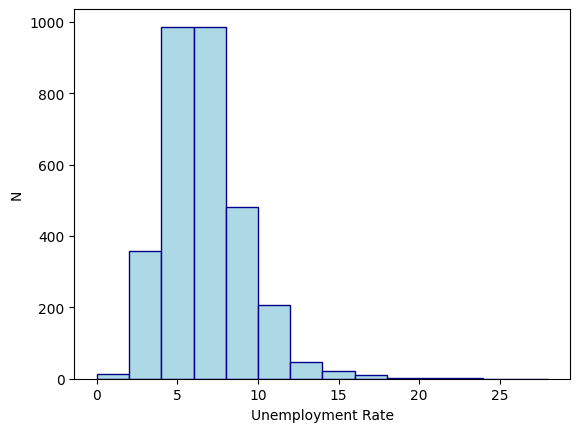

In [16]:
# histograma
fig = plt.figure()
ax = fig.add_subplot(111)

var = 'Unemployment Rate'
#bins=np.arange(0,100,10)
n,bins,patches = ax.hist(dat[var], histtype='bar', ec='darkblue', fc='lightblue', bins=np.arange(0,30,2))
ax.set_xlabel(var)
ax.set_ylabel('N')

**Binning bias.**

Lo histogramas son informativos y permiten entender las características genelares de nuestros datos, pero la gran desventaja, es que los mismos datos pueden interpretarse de distinta forma dependiendo de la elección de bins. La elección del número de bins es arbitraria, lo cual puede generar sesgos (binning bias). Adicionalmente, en un histograma no estamos graficando todos los datos, sino que los agrupamos en bins, y por lo tanto perdemos sus valores. Una regla común es usar un número de bins igual a la raíz cuadrada del número de muestras.

55


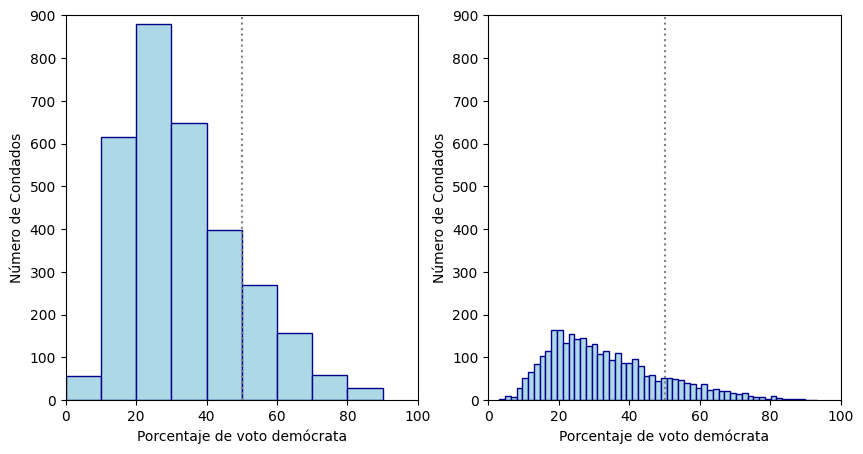

In [17]:
#Notar las diferencias de binning
fig=plt.figure(figsize=(10,5))
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)

bins = np.arange(0,100,10)
nbins = int(np.sqrt(len(dat)))
print(nbins)

_=ax1.hist(dat['pct_D'], bins = bins, histtype='bar', ec='darkblue', fc='lightblue')
_=ax2.hist(dat['pct_D'], bins = nbins, histtype='bar', ec='darkblue', fc='lightblue')

for ax in [ax1,ax2]:
    ax.set_xlabel('Porcentaje de voto demócrata')
    ax.set_ylabel('Número de Condados')
    ax.axvline(x=50, ls=':', color='gray')
    ax.set_ylim(0,900)
    ax.set_xlim(0,100)

## 4. Análisis Exploratorio Multivariado

¿Cómo se comportan las distintas variables políticas y socioeconómicas por región, estado, o según el partido ganador? ¿Podemos sacar alguna conclusión a partir de distintos análisis gráficos?

<Axes: xlabel='pct_D', ylabel='Count'>

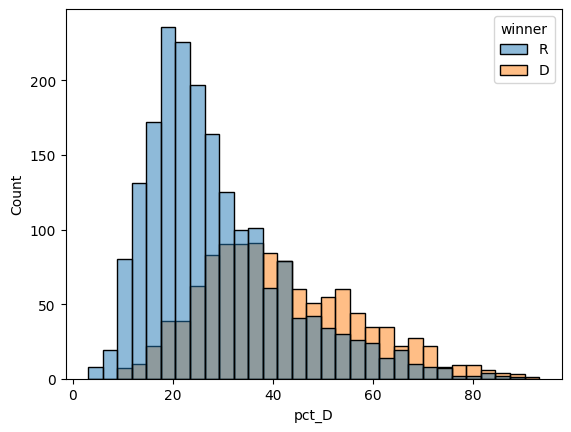

In [18]:
sns.histplot(data=dat2, x='pct_D', hue='winner')

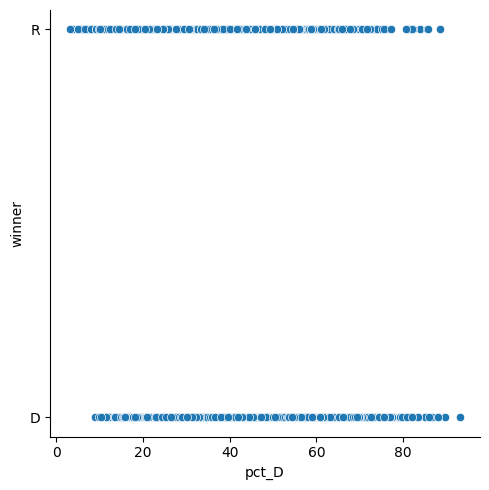

In [19]:
sns.relplot(data=dat2, x='pct_D', y='winner')

C:\Users\gasxd\AppData\Local\Temp\ipykernel_16684\1770339901.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat2['winner'] = ['D' if x>=50.0 else 'R' for x in dat2['pct_D']]


<Axes: xlabel='pct_D', ylabel='Count'>

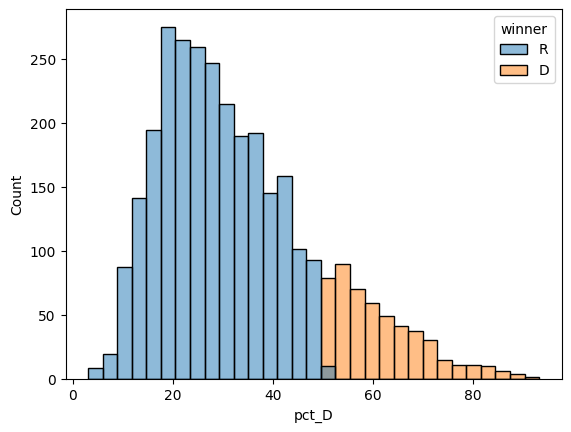

In [20]:
dat2['winner'] = ['D' if x>=50.0 else 'R' for x in dat2['pct_D']]
sns.histplot(data=dat2,x='pct_D',hue='winner')

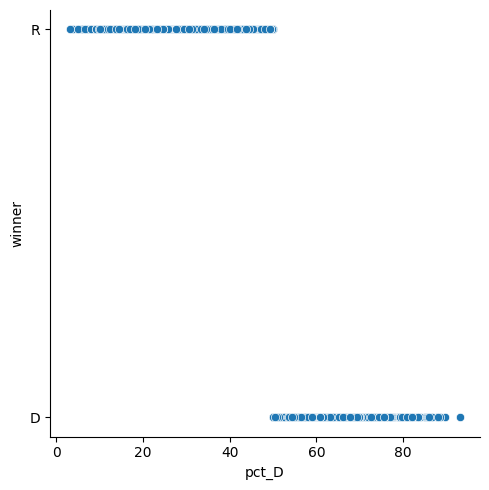

In [21]:
sns.relplot(data=dat2, x='pct_D', y='winner')

In [22]:
columns=['pct_D','pct_R','acs_pct_pop_nonwhite', 'acs_pct_management', 'acs_pct_service',
       'pct_pop25+_bachelor_higher', 'median_household_income',
       'per_capita_income','POPESTIMATE2019','state','county','Unemployment Rate','winner','region']### Boxplot multivariado.

<Axes: xlabel='winner', ylabel='acs_pct_pop_nonwhite'>

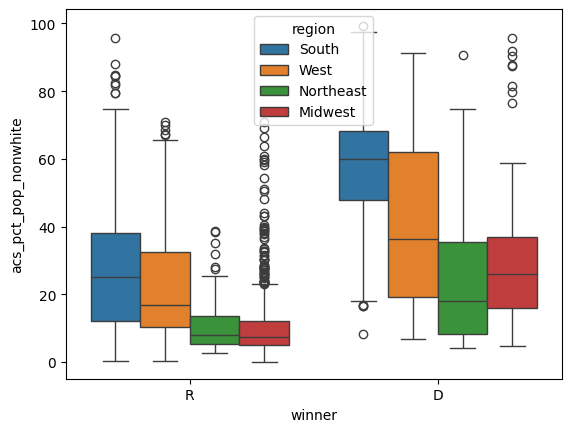

In [23]:
sns.boxplot(data=dat2, y='acs_pct_pop_nonwhite', x='winner', hue='region')

In [ ]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(111)
sns.boxplot(ax=ax,data=dat2,y='acs_pct_pop_nonwhite',x='state',width=0.8)

In [ ]:
#analicemos ahora los coeficientes de correlación para un subconjunto de condados: los que están en swing states
swing = ['GA','PA','AZ','MI','WI',]
dats = dat2[dat2['state'].isin(swing)]
dats

In [ ]:
sns.boxplot(data=dats,y='acs_pct_pop_nonwhite',x='winner',hue='state')

In [ ]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(111)
sns.boxplot(data=dats,y='acs_pct_pop_nonwhite',x='state',hue='winner')

In [ ]:
sns.boxplot(data=dat2,y='acs_pct_pop_nonwhite',x='region',hue='winner')

In [ ]:
sns.boxplot(data=dats,y='acs_pct_pop_nonwhite',x='state',hue='winner')

In [ ]:
sns.boxplot(data=dats,y='Unemployment Rate',x='state',hue='winner')

Para los swing states, se aprecia una tendencia entre el ganador del condado, y el porcentaje de población no-blanca: en general este porcentaje tiene una distribución de valores más altos en los condados donde ganan los demócratas.

### 4.1 Gráficos de dispersión.

Podemos visualizar en más detalle la relación entre estas (y otras variables) usando gráficos de dispersión.

In [ ]:
sns.pairplot(dat2)

In [ ]:
sns.pairplot(dat2,y_vars='pct_D')

In [ ]:
sns.pairplot(dats,y_vars=['pct_D'],x_vars=['acs_pct_pop_nonwhite', 'acs_pct_management', 'Unemployment Rate'],hue='state',aspect=1);

### 4.2 Coeficientes de correlación.

Veamos ahora cómo es la correlación entre variables y cómo visualizarla

In [ ]:
#para calcular los coeficientes de correlación entre todas las variables, es más eficiente usar al función .corr() de pandas
corr = dats[['pct_D', 'pct_R', 'acs_pct_pop_nonwhite', 'acs_pct_management', 'acs_pct_service', 'pct_pop25+_bachelor_higher', 'median_household_income', 'per_capita_income', 'POPESTIMATE2019', 'Unemployment Rate']].corr()
corr

In [ ]:
sns.heatmap(corr);